In [5]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data/chess-openings.csv')
counts = {k:v for k,v in dict(df['opening'].value_counts()).items()}
mean_count = np.array(list([c for c in counts.values() if c > 1])).mean()

In [7]:
orderedDict = dict(sorted(counts.items(), key=lambda item: item[1]))

values = list(orderedDict.values())
keys = list(orderedDict.keys())

values.reverse()
keys.reverse()

n = 10

print("Most Frequent Openings")

print("{:<50} | {:<8}".format("Opening", "Count"))
print("{:-<50}-+-{:-<8}".format("", ""))
for i in range(n):
    print("{:<50} | {:<8}".format(keys[i], values[i]))
    

Most Frequent Openings
Opening                                            | Count   
---------------------------------------------------+---------
Bishops-Opening                                    | 1206    
Scandinavian-Defense                               | 1018    
Queens-Pawn-Opening-Accelerated-London-System      | 966     
Vant-Kruijs-Opening                                | 927     
Sicilian-Defense-Bowdler-Attack                    | 849     
Queens-Pawn-Opening-1...d5-2.e3                    | 782     
Kings-Pawn-Opening-Owens-Defense                   | 709     
Scandinavian-Defense-Mieses-Kotrc-Variation        | 690     
Vant-Kruijs-Opening-1...e5                         | 668     
Philidor-Defense-3.Bc4                             | 661     


In [9]:
maxElo = max(df["white_rating"].max(), df["black_rating"].max())

buckets = 10

bucketLabels = []

stepSize = round(maxElo/buckets, -1)

for i in range(buckets):
    bucketLabels += [str(i*stepSize) + " to " + str((i+1)*stepSize)]

bucketed = df.assign(white_bucket = df["white_rating"]/stepSize-(df["white_rating"]/stepSize)%1)
bucketed = bucketed.assign(black_bucket = bucketed["black_rating"]/stepSize-(bucketed["black_rating"]/stepSize)%1)

bucketedWhite = bucketed.groupby(["white_bucket", "opening"]).size().reset_index(name="count").groupby("white_bucket").max()

bucketedWhite["White_ELO"] = bucketLabels
bucketedWhite = bucketedWhite.set_index("White_ELO")

bucketedWhite

,opening,count
White_ELO,,
0.0 to 320.0,Ware-Opening-Crab-Variation,37
320.0 to 640.0,Ware-Opening-Meadow-Hay-Trap,162
640.0 to 960.0,Ware-Opening-Crab-Variation,349
960.0 to 1280.0,Ware-Opening-Meadow-Hay-Trap,514
1280.0 to 1600.0,Ware-Opening-Crab-Variation,376
1600.0 to 1920.0,Ware-Opening,176
1920.0 to 2240.0,Vienna-Game-Omaha-Gambit,32
2240.0 to 2560.0,Vienna-Game-Zhuravlev-Countergambit,8
2560.0 to 2880.0,Sicilian-Defense-Open-Kupreichik-Variation,4


In [10]:
bucketedBlack = bucketed.groupby(["black_bucket", "opening"]).size().reset_index(name="count").groupby("black_bucket").max()

bucketedBlack["Black_ELO"] = bucketLabels
bucketedBlack = bucketedBlack.set_index("Black_ELO")

bucketedBlack

,opening,count
Black_ELO,,
0.0 to 320.0,Ware-Opening-Crab-Variation,28
320.0 to 640.0,Ware-Opening-Crab-Variation,161
640.0 to 960.0,Ware-Opening-Crab-Variation,370
960.0 to 1280.0,Ware-Opening-Meadow-Hay-Trap,498
1280.0 to 1600.0,Ware-Opening-Crab-Variation,378
1600.0 to 1920.0,Ware-Opening-Crab-Variation,154
1920.0 to 2240.0,Vienna-Game-Omaha-Gambit,39
2240.0 to 2560.0,Vienna-Game-Zhuravlev-Countergambit,7
2560.0 to 2880.0,Ware-Opening-Meadow-Hay-Trap,2


In [11]:
n = 10
wins = dict()

for opening,count in counts.items():
    games = df[df['opening'] == opening]
    
    white = len(games[games['white_result'] == 'win']) / count
    black = len(games[games['black_result'] == 'win']) / count
    
    if count > mean_count:
        wins[opening] = white if white > black else -black

wins = dict(sorted(wins.items(), key=lambda item: item[1], reverse=True))

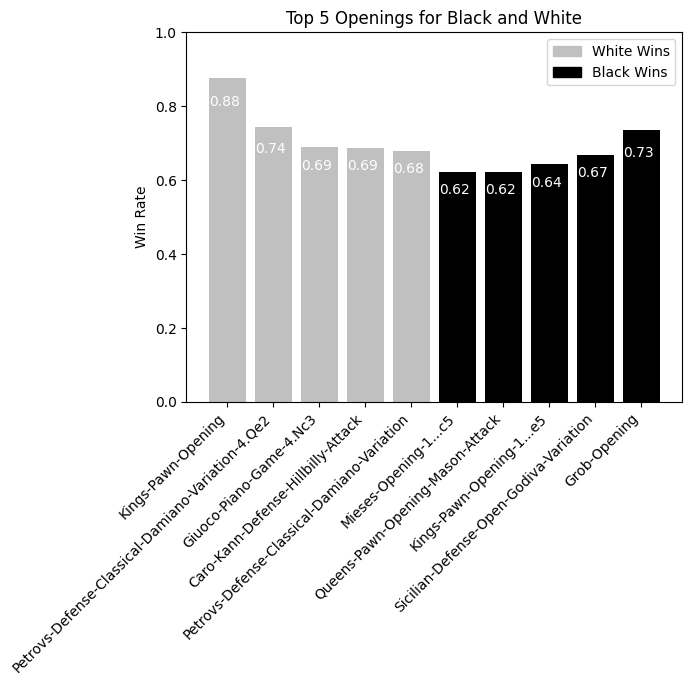

In [12]:
n = 5
os = list(wins.keys())
ps = list(wins.values())

for i in range(len(ps)):
    ps[i] = abs(ps[i])

whiteCol = "silver"
blackCol = "black"
    
colours = [whiteCol]*n + [blackCol]*n
fig, ax = plt.subplots()
bars = ax.bar((os[:n] + os[-6:-1]), (ps[:n] + ps[-6:-1]), color=colours)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x(), yval/1.1, yval, color = 'white')
plt.ylim(ymax = 1, ymin = 0)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Win Rate")
plt.title("Top 5 Openings for Black and White")
#ax.set_facecolor('slategrey')

white_patch = mpatches.Patch(color=whiteCol, label='White Wins')
black_patch = mpatches.Patch(color=blackCol, label='Black Wins')
plt.legend(handles=[white_patch, black_patch])

plt.show()